<a href="https://colab.research.google.com/github/pbannuru/DEEP-LEARNING/blob/main/keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 

In [2]:
tf.__version__ 

'2.8.2'

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi


Thu Oct  6 13:23:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
tf.keras.__version__

'2.8.0'

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
img = x_train[0]
img.shape

(28, 28)

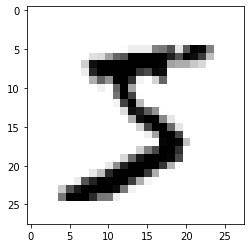

In [11]:
plt.imshow(img,cmap='binary')

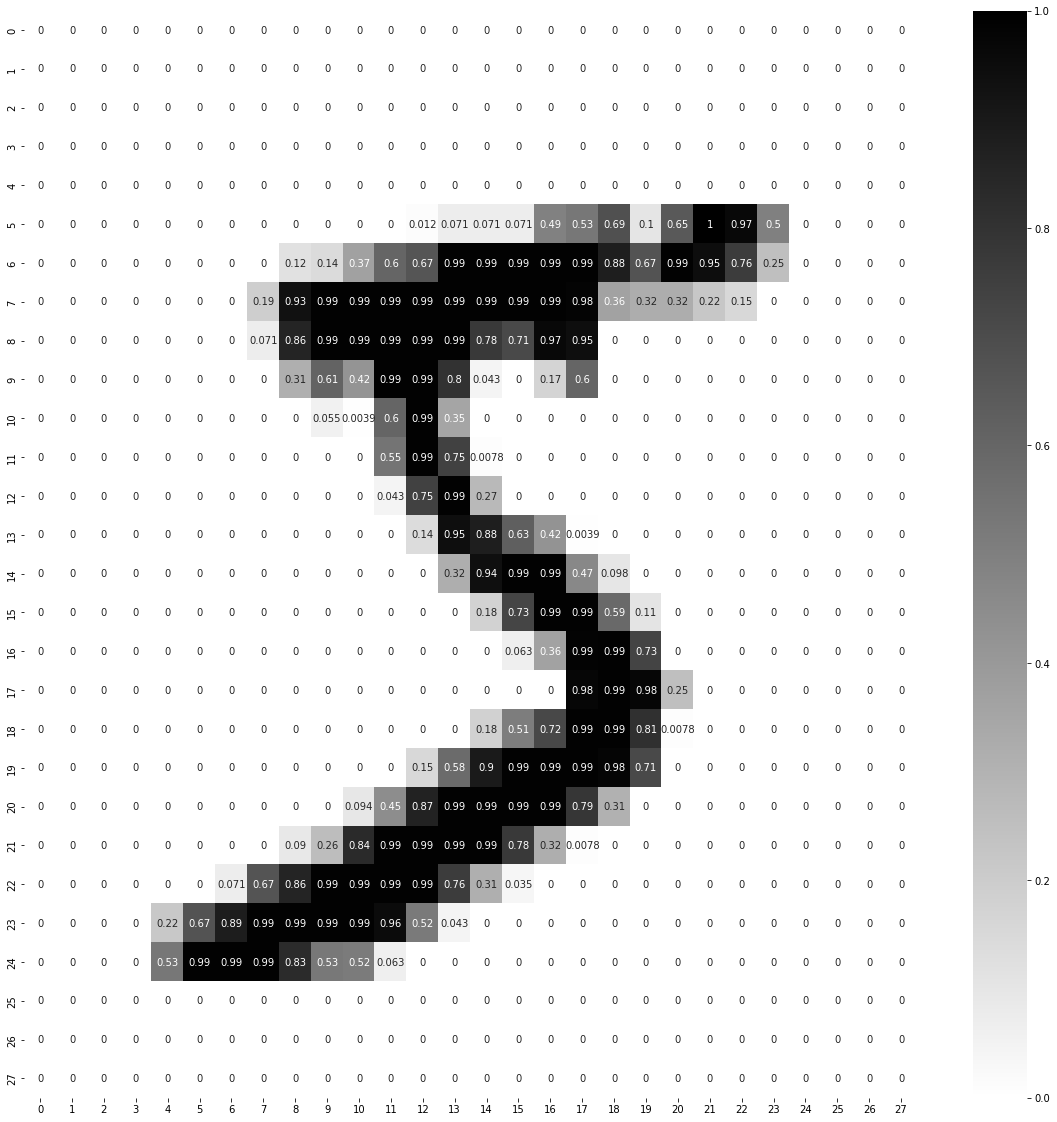

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True,cmap='binary')

In [13]:
# creating valid and training set
x_valid,x_train = x_train[:5000]/255,x_train[5000:]/255
y_valid,y_train = y_train[:5000],y_train[5000:]

x_test = x_test /255

In [14]:
x_train.shape


(55000, 28, 28)

In [15]:
y_train.shape

(55000,)

In [16]:
layers = [
    tf.keras.layers.Flatten(input_shape=(28,28),name='input_layer'),
    tf.keras.layers.Dense(300,activation='relu',name='HL'),
    tf.keras.layers.Dense(100,activation='relu',name='HL2'),
    tf.keras.layers.Dense(10,activation='softmax',name='ouput')
          ]

In [17]:
model =tf.keras.models.Sequential(layers) # for connecting all neurons in all layers

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 HL (Dense)                  (None, 300)               235500    
                                                                 
 HL2 (Dense)                 (None, 100)               30100     
                                                                 
 ouput (Dense)               (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# 28*28=784 = input from matrix to flatten layer
# 784*300 weights+300 bias = 235500

# 300*100+100 =30100

In [20]:
weights,bias=model.layers[1].get_weights()

In [21]:
print(weights.shape)
print(bias.shape)

(784, 300)
(300,)


In [22]:
print(weights)


[[ 0.02893365  0.02523151  0.00260407 ...  0.036157   -0.05378662
  -0.01946151]
 [-0.05044981 -0.07300315 -0.01756466 ... -0.01217509 -0.01826013
   0.05826394]
 [-0.0007504   0.02442437  0.01305581 ... -0.02549815  0.00515675
  -0.02514068]
 ...
 [-0.05788855 -0.00977599  0.00707157 ... -0.04893202 -0.04628262
  -0.00846379]
 [-0.01353755 -0.02976055  0.00643945 ... -0.04819517 -0.03085959
   0.05753528]
 [ 0.07219513  0.00736915 -0.0564895  ... -0.05690374  0.06866455
   0.05811723]]


In [23]:
print(bias)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
loss_function_ = "sparse_categorical_crossentropy"   # loss = y-y_hat
optimiser_ = "SGD"
metrics_=['accuracy']

model.compile(loss=loss_function_,
              optimizer=optimiser_,
              metrics=metrics_)

In [25]:
EPOCHS=30
validation = (x_valid,y_valid)
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=validation)  # after every epoch it will check result with validation data

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6102 - accuracy: 0.8424 - val_loss: 0.3047 - val_accuracy: 0.9194
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2807 - accuracy: 0.9200 - val_loss: 0.2392 - val_accuracy: 0.9334
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2278 - accuracy: 0.9346 - val_loss: 0.1967 - val_accuracy: 0.9442
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1941 - accuracy: 0.9450 - val_loss: 0.1731 - val_accuracy: 0.9534
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1697 - accuracy: 0.9517 - val_loss: 0.1545 - val_accuracy: 0.9576
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1506 - accuracy: 0.9567 - val_loss: 0.1402 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1354 - accuracy: 0.9615 - val_loss: 0.1294 - val_accuracy:

# ->55000/32=1719 batches (steps per epoch) , each has 32 images 
# ->32 is default

In [26]:
result_df=pd.DataFrame(history.history)

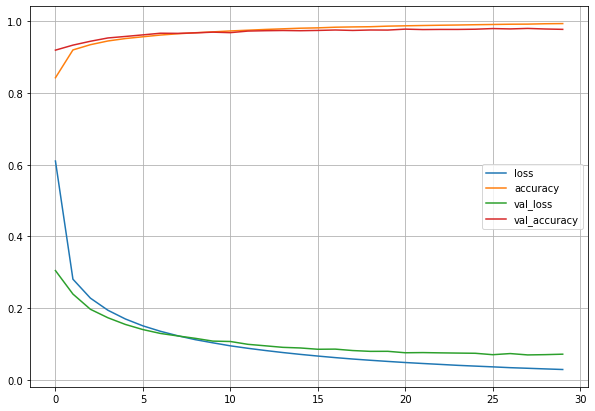

In [27]:
result_df.plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9783


[0.06904999911785126, 0.9782999753952026]

In [29]:
x_test.shape[0]/32

312.5

In [30]:
model.save("test.h5")

In [31]:
x_new=x_test[:3]
y_prob = model.predict(x_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

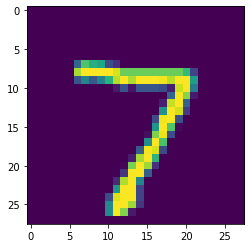

In [32]:
plt.imshow(x_new[0])     

In [33]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1])

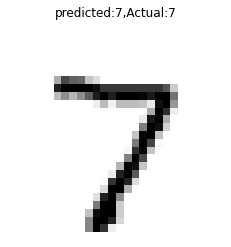

------------------------------------------------------------------------------------------


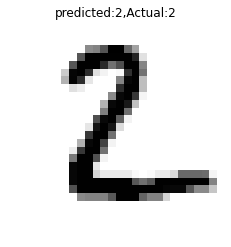

------------------------------------------------------------------------------------------


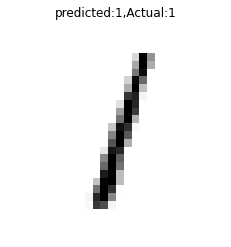

------------------------------------------------------------------------------------------


In [34]:
for image_array , pred, actual in zip(x_new,y_pred,y_test[:3]):
  plt.imshow(image_array,cmap='binary')
  plt.title(f"predicted:{pred},Actual:{actual}")
  plt.axis('off')
  plt.show()
  print("---"*30)